In [1]:
import os

In [2]:
test = os.path.join('test')
testt = os.listdir(test)
print(f'test: {testt[:10]}')

test: ['val_1.jpg', 'val_10.jpg', 'val_100.png', 'val_101.png', 'val_102.png', 'val_103.png', 'val_104.png', 'val_105.png', 'val_106.png', 'val_107.png']


In [3]:
train_horse_dir = os.path.join('train\horses')

train_human_dir = os.path.join('train\humans')

validation_horse_dir = os.path.join(r'D:\haidy\ass2_appli_vission\validation\valid_horse')

validation_human_dir = os.path.join(r'D:\haidy\ass2_appli_vission\validation\valid_human')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN_HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN_HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL_HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL_HUMANS: {validation_human_names[:10]}')

TRAIN_HORSES: ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
TRAIN_HUMANS: ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\haidy\\ass2_appli_vission\\validation\\valid_horse'

In [43]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 495
total training human images: 495
total validation horse images: 105
total validation human images: 105


In [ ]:
"""import split_folders
input_folders="train"
output="validation_"
split_folders.ratio(input_folders,output=output,seed=42,ratio=(.75,.25))"""

In [44]:
import tensorflow as tf

In [87]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),


    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [88]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 35, 35, 64)      

In [89]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        './train/', 
        target_size=(300, 300), 
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        './validation/', 
        target_size=(300, 300),  
        batch_size=105*2//8,
        class_mode='binary')

Found 990 images belonging to 2 classes.
Found 210 images belonging to 2 classes.


In [91]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"End of epoch {epoch+1} - Custom actions here")
        if logs.get("loss") <= 0.2:
            return

my_callback = MyCallback()
early_stopping = EarlyStopping(
                              patience=10,
                              min_delta=0.001,                               
                              monitor="val_loss",
                              restore_best_weights=True
                              )
# Fit the model with the callback
# history = model.fit(
#     train_generator,
#     # steps_per_epoch=8,
#     epochs=8,
#     verbose=1,
#     validation_data=validation_generator,
#     validation_steps=8,
#     callbacks=[early_stopping]
# )


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
# mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# fit model
history = model.fit(train_generator,
    #   steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8, 
    callbacks=[es, mc])


Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 0.6573 - accuracy: 0.5869
Epoch 1: val_loss improved from inf to 0.45191, saving model to best_model.h5
8/8 [==============================] - 21s 3s/step - loss: 0.6573 - accuracy: 0.5869 - val_loss: 0.4519 - val_accuracy: 0.9231
Epoch 2/15
8/8 [==============================] - ETA: 0s - loss: 0.4345 - accuracy: 0.8192
Epoch 2: val_loss improved from 0.45191 to 0.30324, saving model to best_model.h5
8/8 [==============================] - 20s 3s/step - loss: 0.4345 - accuracy: 0.8192 - val_loss: 0.3032 - val_accuracy: 0.9087
Epoch 3/15
8/8 [==============================] - ETA: 0s - loss: 0.3121 - accuracy: 0.8949
Epoch 3: val_loss improved from 0.30324 to 0.21458, saving model to best_model.h5
8/8 [==============================] - 20s 3s/step - loss: 0.3121 - accuracy: 0.8949 - val_loss: 0.2146 - val_accuracy: 0.9231
Epoch 4/15
8/8 [==============================] - ETA: 0s - loss: 0.3128 - accuracy: 0.9000
Epoch 4: 

In [53]:
"""history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)"""

Epoch 1/15
1/8 [==>...........................] - ETA: 19s - loss: 2.0029 - accuracy: 0.5391

KeyboardInterrupt: 

In [55]:
"""from keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# # fit model

# history = model.fit(train_generator,
#       steps_per_epoch=8,  
#       epochs=15,
#       verbose=1,
#       validation_data = validation_generator,
#       validation_steps=8, 
#       callbacks=[es])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8, 
    callbacks=[es, mc])

"""

Epoch 1/15
8/8 [==============================] - 20s 2s/step - loss: 0.1867 - accuracy: 0.9343 - val_loss: 0.1995 - val_accuracy: 0.8952
Epoch 2/15
8/8 [==============================] - 19s 2s/step - loss: 0.1145 - accuracy: 0.9556
Epoch 3/15
8/8 [==============================] - 19s 2s/step - loss: 0.0787 - accuracy: 0.9697
Epoch 4/15
8/8 [==============================] - 19s 2s/step - loss: 0.5178 - accuracy: 0.8202
Epoch 5/15
8/8 [==============================] - 19s 2s/step - loss: 0.2052 - accuracy: 0.9121
Epoch 6/15
8/8 [==============================] - 20s 2s/step - loss: 0.1313 - accuracy: 0.9444
Epoch 7/15
8/8 [==============================] - 20s 2s/step - loss: 0.0611 - accuracy: 0.9758
Epoch 8/15
8/8 [==============================] - 20s 2s/step - loss: 0.0449 - accuracy: 0.9869
Epoch 9/15
8/8 [==============================] - 20s 2s/step - loss: 0.2648 - accuracy: 0.9414
Epoch 10/15
8/8 [==============================] - 20s 2s/step - loss: 1.6229 - accuracy: 0.84

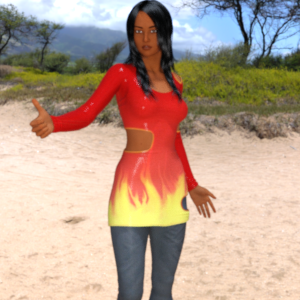

In [92]:
from PIL import Image
"""img = Image.open("train/humans/human14-09.png")
img"""

In [ ]:
import imageio

images_path = r'Detect solar dust_Task-1-Data Collection\Dusty\Dirty PV'

images = ['Detect solar dust_Task-1-Data Collection\\Dusty\\Dirty PV\\pollen-sahara-dust-cloud-combined-600w-2161018959.jpg',
 'Detect solar dust_Task-1-Data Collection\\Dusty\\Dirty PV\\pollen-sahara-dust-cloud-combined-600w-2161351973.jpg']

images = [imageio.imread(image) for image in images]

def reshape_images(images):
    for ind,img in enumerate(images):
        images[ind] = img.reshape(img.shape[0], img.shape[1], img.shape[2])
    return images

In [110]:
import numpy as np
from keras.preprocessing import image
from keras_preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from PIL import Image
import matplotlib.pyplot as plt


path = r'D:\haidy\ass2_appli_vission\test\\'
preds = {}
for i in testt:
    # img = Image.open(path)
    img = tf.io.read_file(path +i )
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(images=img, size=[300, 300])
    x = np.asarray(img)
    # x /= 255.
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    # pred = classes[0]
        
    if classes[0]>0.5:
        # print(pred, "human")
        preds[i] = "human"
        
    else:
        preds[i] = "horse"
        # print(pred, "horse")

1/1 [==============================] - 0s 18ms/step


In [111]:
preds

{'val_1.jpg': 'horse',
 'val_10.jpg': 'human',
 'val_100.png': 'human',
 'val_101.png': 'human',
 'val_102.png': 'horse',
 'val_103.png': 'horse',
 'val_104.png': 'horse',
 'val_105.png': 'horse',
 'val_106.png': 'horse',
 'val_107.png': 'horse',
 'val_108.png': 'horse',
 'val_109.png': 'human',
 'val_11.jpg': 'horse',
 'val_110.png': 'human',
 'val_111.png': 'human',
 'val_112.png': 'horse',
 'val_113.png': 'human',
 'val_114.png': 'human',
 'val_115.png': 'horse',
 'val_116.png': 'horse',
 'val_117.png': 'horse',
 'val_118.png': 'horse',
 'val_119.png': 'horse',
 'val_12.jpg': 'horse',
 'val_120.png': 'horse',
 'val_121.png': 'horse',
 'val_122.png': 'horse',
 'val_123.png': 'horse',
 'val_124.png': 'human',
 'val_125.png': 'human',
 'val_126.png': 'horse',
 'val_127.png': 'horse',
 'val_128.png': 'horse',
 'val_129.png': 'human',
 'val_13.jpg': 'horse',
 'val_130.png': 'human',
 'val_131.png': 'human',
 'val_132.png': 'human',
 'val_133.png': 'horse',
 'val_134.png': 'horse',
 'val_

In [119]:
import pandas as pd
pd.DataFrame(preds, index = [0]).T.to_csv("sub_dod.csv")